In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

file_path = r"C:\Users\HP\Downloads\online+retail\Online Retail.xlsx"
data = pd.read_excel(file_path)

data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [5]:
data.describe(include = ['object'])

InvoiceNo StockCode                         Description  \
count      541909    541909                              540455   
unique      25900      4070                                4223   
top        573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq         1114      2313                                2369   

               Country  
count           541909  
unique              38  
top     United Kingdom  
freq            495478

In [6]:
data.query("CustomerID.isnull()").head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom

In [7]:
# Rows where Quantity is negative
data[data['Quantity'] < 0][:5]

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom

In [8]:
# To find out if invoice number obey 6 digits number
# Row where invoice number is not a 6-digit

data['InvoiceNo'] = data['InvoiceNo'].astype(str)
invalid_invoices = data[~data['InvoiceNo'].str.match(r'^\d{6}$')]
invalid_invoices.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom

### Removes all numeric digits (0-9) from the InvoiceNo column
### Removes any character that is not an alphanumeric character

In [9]:
data['InvoiceNo'].str.replace('[0-9]', '', regex = True).unique()
data['InvoiceNo'].str.replace('[^a-zA-Z0-9]', '', regex=True).unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      shape=(25900,), dtype=object)

In [10]:
# Row where stockcode has more than/less than 5 digits
data['StockCode'] = data['StockCode'].astype(str)

data[~data['StockCode'].str.match(r'^\d{5}$')].head()

# df[df['StockCode'].str.match('^\\d{5}$')==False].head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
45    536370      POST                              POSTAGE         3   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
45 2010-12-01 08:45:00      18.00     12583.0          France

### Row where StockCode contains PAD

In [11]:
data[~data['StockCode'].str.match(r'^PAD$')].head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

### Data Cleaning

In [12]:
cleaned_data = data.copy()

In [13]:
cleaned_data["InvoiceNo"] = cleaned_data["InvoiceNo"].astype("str")
mask = cleaned_data['InvoiceNo'].str.match(r'\d{6}$')
cleaned_data = cleaned_data[mask]
cleaned_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

### Rows where the StockCode is either:
- __Exactly 5 digits__
- __Exactly 5 digits followed by alphanumeric characters__
- __The exact string PAD__

In [15]:
mask = (cleaned_data['StockCode'].str.match(r'^\d{5}') | # 5-digits
        cleaned_data['StockCode'].str.match(r'^\d{5}[a-zA-Z]+$') | # alphanumeric
        cleaned_data['StockCode'].str.match(r'^PAD$')) # PAD
cleaned_data = cleaned_data[mask]
cleaned_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [16]:
cleaned_data.dropna(subset = 'CustomerID', inplace = True)
cleaned_data.describe().round(2)

Quantity                    InvoiceDate  UnitPrice  CustomerID
count  396370.00                         396370  396370.00   396370.00
mean       13.05  2011-07-11 00:04:30.985594624       2.87    15301.60
min         1.00            2010-12-01 08:26:00       0.00    12346.00
25%         2.00            2011-04-07 11:16:00       1.25    13975.00
50%         6.00            2011-07-31 14:39:00       1.95    15159.00
75%        12.00            2011-10-20 14:41:00       3.75    16803.00
max     80995.00            2011-12-09 12:50:00     649.50    18287.00
std       180.73                            NaN       4.26     1709.98

In [17]:
# Percentage of data dropped
dropped_percentage = (len(cleaned_data)/len(data))*100
print(dropped_percentage)

73.14327682323047


### Feature Engineering

In [18]:
# Creating column for total sale of each line
cleaned_data['TotalSale'] = cleaned_data['Quantity']*cleaned_data['UnitPrice']
cleaned_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSale  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom      15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom      22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34

In [19]:
filtered_data = cleaned_data[cleaned_data['CustomerID'] == 17850.0]
total_sale = filtered_data['TotalSale'].sum()
print(total_sale.round(2))

5391.21


### Data Aggregating

In [20]:
agg_data = cleaned_data.groupby(by = 'CustomerID', as_index = False)
agg_data

### Recency, Frequency and Monetary Value (RFM)

In [21]:
# Calculate Frequency and Monetary Values of customers
agg_data = cleaned_data.groupby(by = 'CustomerID', as_index = False) \
    .agg(MonetaryValue = ('TotalSale', 'sum'),
        Frequency = ('InvoiceNo', 'nunique'),
        LastInvoiceDate = ('InvoiceDate', 'max'))

# Calculate Recency of Customers
max_invoice_date = agg_data['LastInvoiceDate'].max()
agg_data['Recency'] = (max_invoice_date - agg_data['LastInvoiceDate']).dt.days
         
pd.set_option('display.max_columns', None)
agg_data.head() 

CustomerID  MonetaryValue  Frequency     LastInvoiceDate  Recency
0     12346.0       77183.60          1 2011-01-18 10:01:00      325
1     12347.0        4310.00          7 2011-12-07 15:52:00        1
2     12348.0        1437.24          4 2011-09-25 13:13:00       74
3     12349.0        1457.55          1 2011-11-21 09:51:00       18
4     12350.0         294.40          1 2011-02-02 16:01:00      309

### Determine Outliers in the Aggregate Data

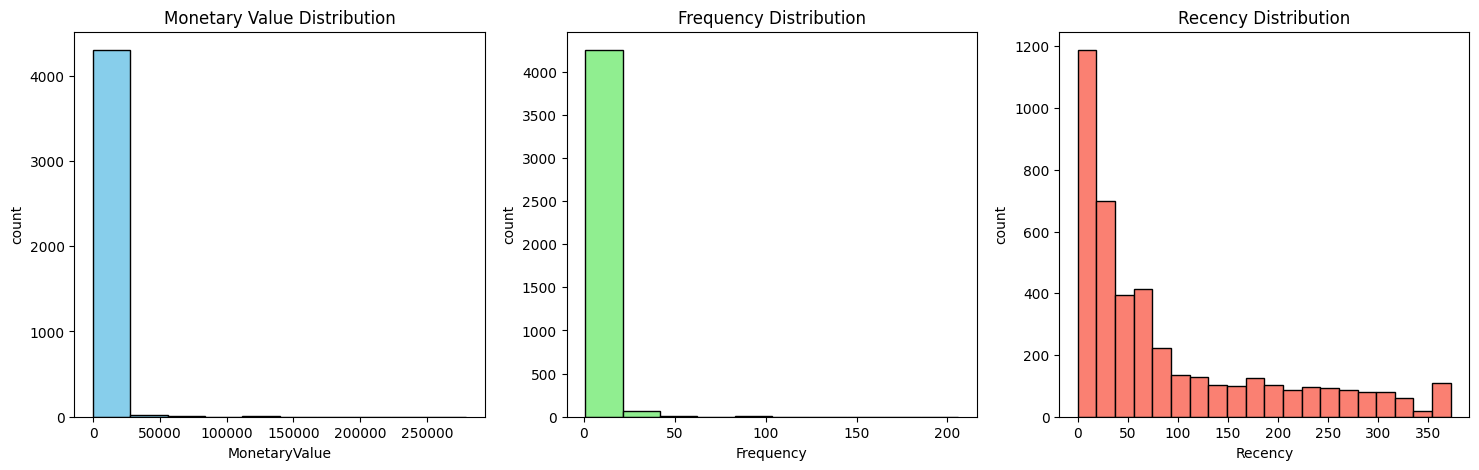

In [20]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
plt.hist(agg_data['MonetaryValue'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Monetary Value Distribution')
plt.xlabel('MonetaryValue')
plt.ylabel('count')

plt.subplot(1, 3, 2)
plt.hist(agg_data['Frequency'], bins = 10, color = 'lightgreen', edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('count')

plt.subplot(1, 3, 3)
plt.hist(agg_data['Recency'], bins = 20, color = 'salmon', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('count')

plt.tight_layout
plt.show()

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=("Monetary Value Distribution", "Frequency Distribution", "Recency Distribution"))

# Add histogram for Monetary Value
fig.add_trace(
    go.Histogram(x=agg_data['MonetaryValue'], nbinsx=10, marker_color='skyblue'),
    row=1, col=1
)

# Add histogram for Frequency
fig.add_trace(
    go.Histogram(x=agg_data['Frequency'], nbinsx=10, marker_color='lightgreen'),
    row=1, col=2
)

# Add histogram for Recency
fig.add_trace(
    go.Histogram(x=agg_data['Recency'], nbinsx=20, marker_color='salmon'),
    row=1, col=3
)

# Update layout
fig.update_layout(
    height=500, width=1200,
    title_text="RFM Feature Distributions",
    showlegend=False
)

fig.show()


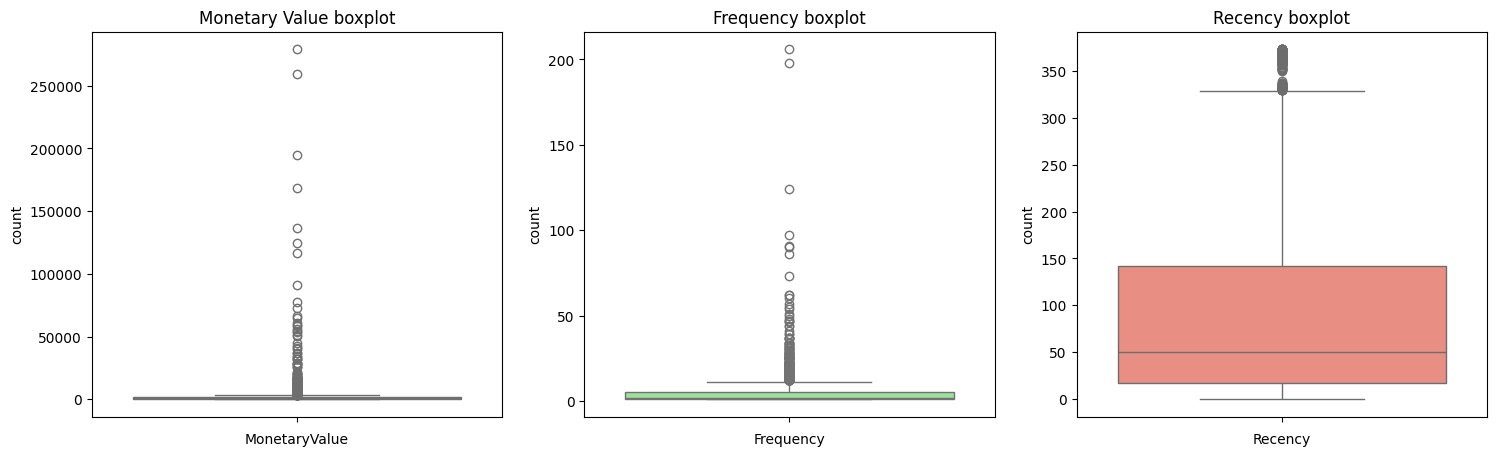

In [24]:
import seaborn as sns
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(agg_data['MonetaryValue'], color = 'skyblue')
plt.title('Monetary Value boxplot')
plt.xlabel('MonetaryValue')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.boxplot(agg_data['Frequency'], color = 'lightgreen')
plt.title('Frequency boxplot')
plt.xlabel('Frequency')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.boxplot(agg_data['Recency'], color = 'salmon')
plt.title('Recency boxplot')
plt.xlabel('Recency')
plt.ylabel('count')

plt.tight_layout
plt.show()

### Dealing with Outliers

In [25]:
# Dealing with Monetary Outlier
mon_q1 = agg_data['MonetaryValue'].quantile(0.25)
mon_q3 = agg_data['MonetaryValue'].quantile(0.75)

IQR = mon_q3 - mon_q1

monetary_outliers = agg_data[(agg_data['MonetaryValue'] > (mon_q3 + 1.5 * IQR))
    | (agg_data['MonetaryValue'] < (mon_q1 - 1.5 * IQR))].copy()

# Dealing with Frequency Outlier
freq_q1 = agg_data['Frequency'].quantile(0.25)
freq_q3 = agg_data['Frequency'].quantile(0.75)

IQR = freq_q3 - freq_q1

frequency_outliers = agg_data[(agg_data['Frequency'] > (freq_q3 + 1.5 * IQR))
    | (agg_data['Frequency'] < (freq_q1 - 1.5 * IQR))].copy()

# Dealing with Recency Outlier
rec_q1 = agg_data['Recency'].quantile(0.25)
rec_q3 = agg_data['Recency'].quantile(0.75)

IQR = rec_q3 - rec_q1

recency_outliers = agg_data[(agg_data['Recency'] > (rec_q3 + 1.5 * IQR))
    | (agg_data['Recency'] < (rec_q1 - 1.5 * IQR))].copy()

### Non-Outlier DataFrame

In [26]:
non_outliers = agg_data[(~agg_data.index.isin(monetary_outliers.index))
                            & (~agg_data.index.isin(frequency_outliers.index))]
non_outliers.head()

CustomerID  MonetaryValue  Frequency     LastInvoiceDate  Recency
2     12348.0        1437.24          4 2011-09-25 13:13:00       74
3     12349.0        1457.55          1 2011-11-21 09:51:00       18
4     12350.0         294.40          1 2011-02-02 16:01:00      309
5     12352.0        1385.74          7 2011-11-03 14:37:00       35
6     12353.0          89.00          1 2011-05-19 17:47:00      203

### Boxplot of non-outliers DataFrame

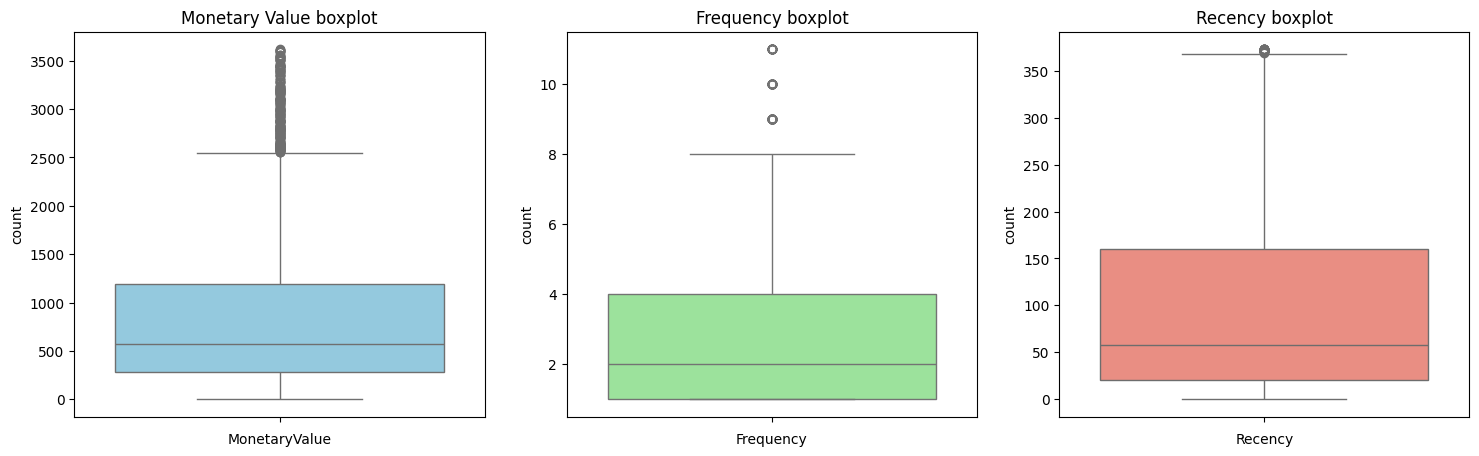

In [27]:
import seaborn as sns
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(non_outliers['MonetaryValue'], color = 'skyblue')
plt.title('Monetary Value boxplot')
plt.xlabel('MonetaryValue')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.boxplot(non_outliers['Frequency'], color = 'lightgreen')
plt.title('Frequency boxplot')
plt.xlabel('Frequency')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.boxplot(non_outliers['Recency'], color = 'salmon')
plt.title('Recency boxplot')
plt.xlabel('Recency')
plt.ylabel('count')

plt.tight_layout
plt.show()

### 3-Dimensional Scatterplot for CustomerID

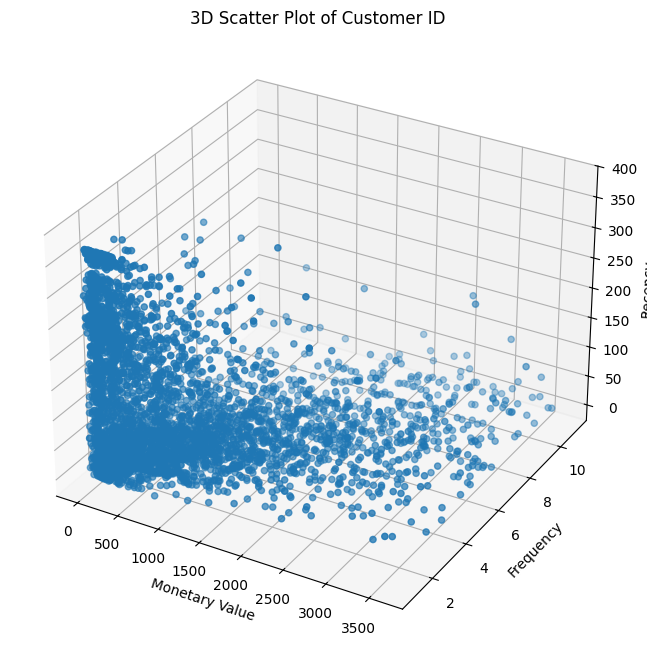

In [28]:
fig = plt.figure(figsize = (10, 8))

ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers['MonetaryValue'],non_outliers['Frequency'],non_outliers['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer ID')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

rfm = ['MonetaryValue', 'Frequency', 'Recency']

non_outliers_scaled = scaler.fit_transform(non_outliers[rfm])
non_outliers_scaled = pd.DataFrame(non_outliers_scaled, index = non_outliers.index, columns = rfm)
non_outliers_scaled.head().round(2)

MonetaryValue  Frequency  Recency
2           0.73       0.57    -0.25
3           0.76      -0.81    -0.80
4          -0.70      -0.81     2.05
5           0.67       1.96    -0.64
6          -0.96      -0.81     1.01

### 3-Dimensional Scatterplot for CustomerID After Scaled

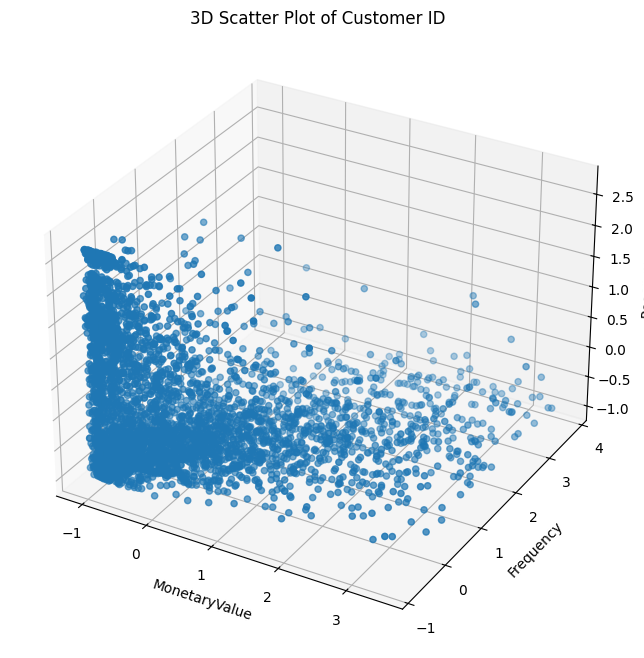

In [30]:
fig = plt.figure(figsize = (10, 8))

ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers_scaled['MonetaryValue'], non_outliers_scaled['Frequency'], 
           non_outliers_scaled['Recency'])
ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer ID')
plt.show()

### Elbow Method To Determine The Number of K-Clusters

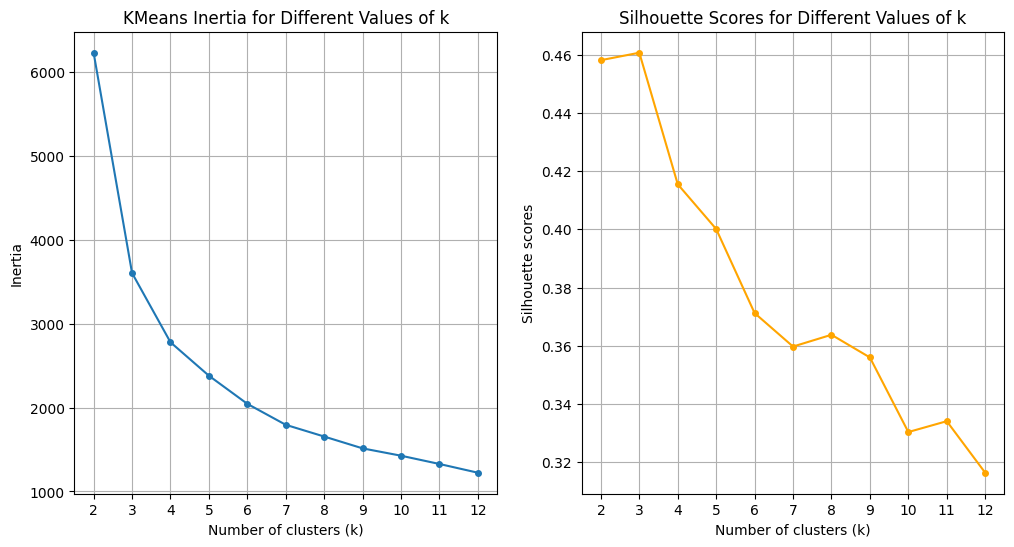

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming non_outliers_scaled is already defined
max_k = 12
inertia = []
silhouette_scores = []  # Create a list to store silhouette scores
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    
    cluster_labels = kmeans.fit_predict(non_outliers_scaled)
    
    # Calculate and store the silhouette score
    sil_score = silhouette_score(non_outliers_scaled, cluster_labels)
    silhouette_scores.append(sil_score)
    
    # Store inertia values
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(12, 6))

# Plot inertia
plt.subplot(1, 2, 1)  # Fix the subplot index
plt.plot(k_values, inertia, marker='o', markersize=4.0)
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', markersize=4.0, color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette scores')
plt.xticks(k_values)
plt.grid(True)

plt.show()

### Cluster Labels

In [33]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)

cluster_labels = kmeans.fit_predict(non_outliers_scaled)

cluster_labels

array([3, 0, 1, ..., 1, 0, 3], shape=(3864,), dtype=int32)

In [34]:
non_outliers['Cluster'] = cluster_labels
non_outliers.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_10788\1314222009.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CustomerID  MonetaryValue  Frequency     LastInvoiceDate  Recency  Cluster
2     12348.0        1437.24          4 2011-09-25 13:13:00       74        3
3     12349.0        1457.55          1 2011-11-21 09:51:00       18        0
4     12350.0         294.40          1 2011-02-02 16:01:00      309        1
5     12352.0        1385.74          7 2011-11-03 14:37:00       35        2
6     12353.0          89.00          1 2011-05-19 17:47:00      203        1

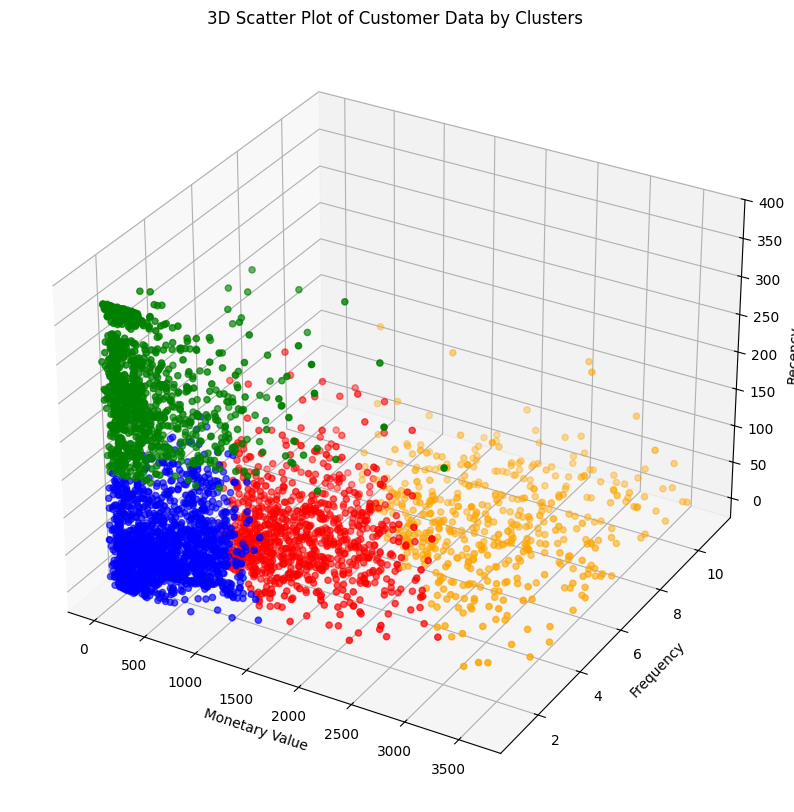

In [36]:
cluster_colors = {0 : 'blue', 1 : 'green', 2 : 'orange', 3 : 'red'}
colors = non_outliers['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers['MonetaryValue'],
                     non_outliers['Frequency'],
                     non_outliers['Recency'],
                    c = colors, marker = 'o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Clusters')
plt.show()

### Violin Plot

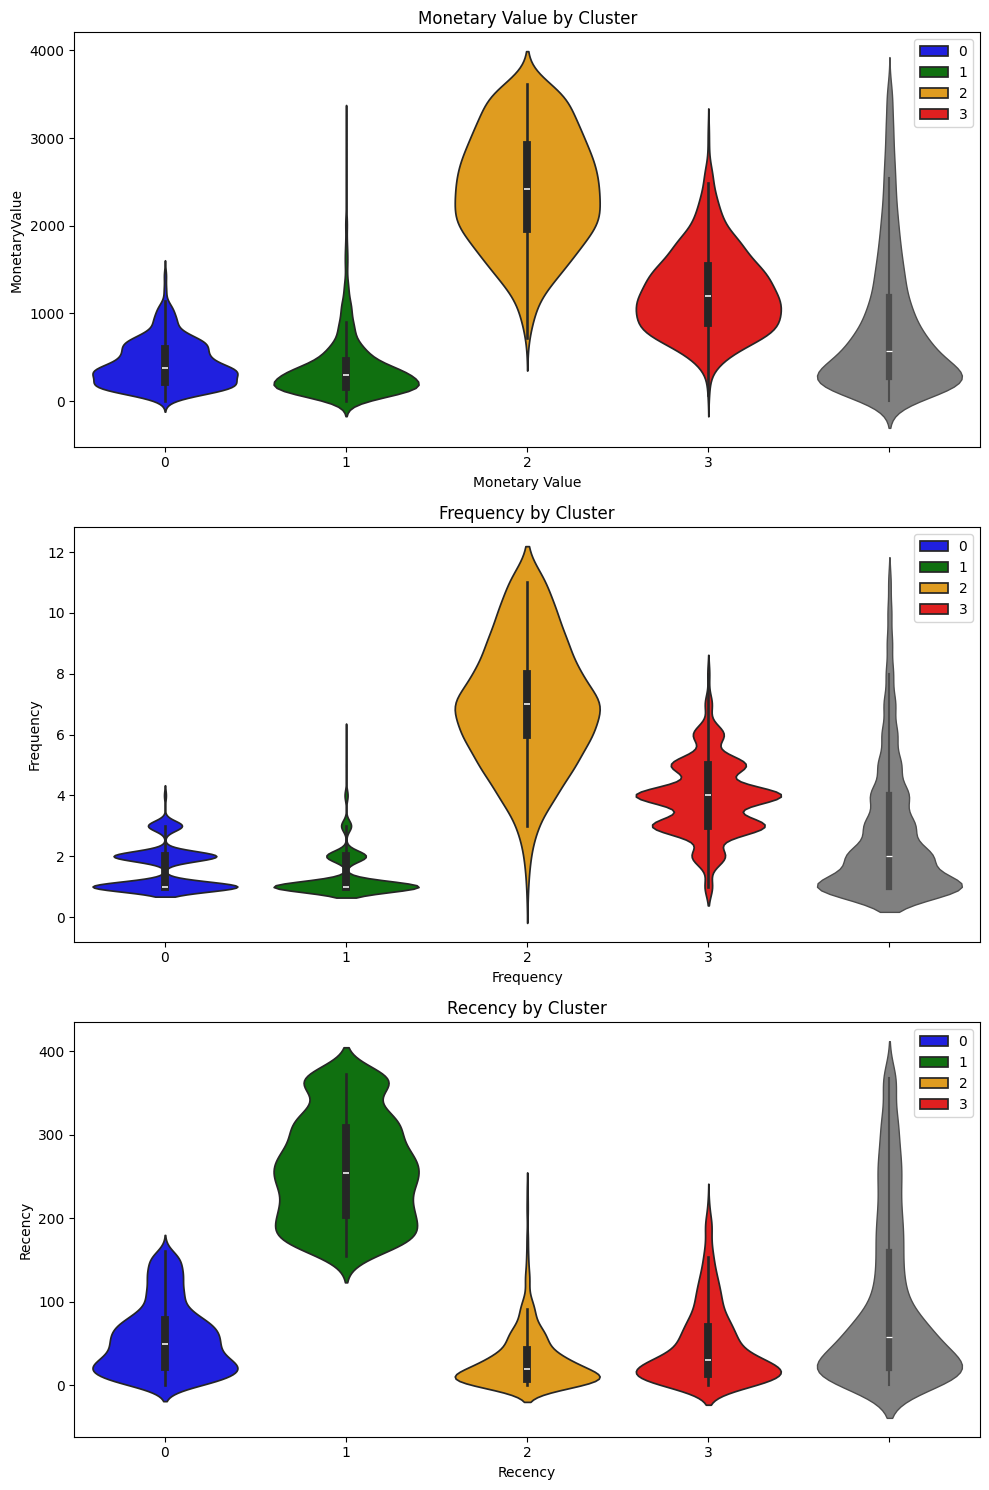

In [38]:
plt.figure(figsize = (10, 15))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers['Cluster'], y = non_outliers['MonetaryValue'], palette = cluster_colors, hue = non_outliers['Cluster'])
sns.violinplot(y = non_outliers['MonetaryValue'], color = 'gray', linewidth = 1.0)
plt.title('Monetary Value by Cluster')
plt.xlabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x = non_outliers['Cluster'], y = non_outliers['Frequency'], palette = cluster_colors, hue = non_outliers['Cluster'])
sns.violinplot(y = non_outliers['Frequency'], color = 'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.xlabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x = non_outliers['Cluster'], y = non_outliers['Recency'], palette = cluster_colors, hue = non_outliers['Cluster'])
sns.violinplot(y = non_outliers['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


### Interpretation of the Violin Plots
1. **Cluster 0 (Blue): "Retain"**

**Rationale:** This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
<br/>**Action:** Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. **Cluster 1 (Green): "Re-Engage"**

**Rationale:** This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
<br/>**Action:**: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. **Cluster 2 (Orange): "Nurture"**

**Rationale:** This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
<br/>**Action:** Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. **Cluster 3 (Red): "Reward"**

**Rationale:** This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
<br/>**Action:** Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

_**<u>Summary of Cluster Name</u>**_  
- **Cluster 0 (Blue): "Retain"**
- **Cluster 1 (Green): "Re-Engage"**
- **Cluster 2 (Orange): "Nurture"**
- **Cluster 3 (Red): "Reward"**


### Indices appearing in both Monetary and Frequency Outliers

In [39]:
overlap_indices = monetary_outliers.index.intersection(frequency_outliers.index)

monetary_only_outliers = monetary_outliers.drop(overlap_indices)
frequency_only_outliers = frequency_outliers.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_clusters = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters.head()

CustomerID  MonetaryValue  Frequency     LastInvoiceDate  Recency  Cluster
0      12346.0       77183.60          1 2011-01-18 10:01:00      325       -1
1      12347.0        4310.00          7 2011-12-07 15:52:00        1       -1
10     12357.0        6207.67          1 2011-11-06 16:07:00       32       -1
12     12359.0        6372.58          4 2011-10-13 12:47:00       57       -1
15     12362.0        4737.23         10 2011-12-06 15:40:00        2       -1

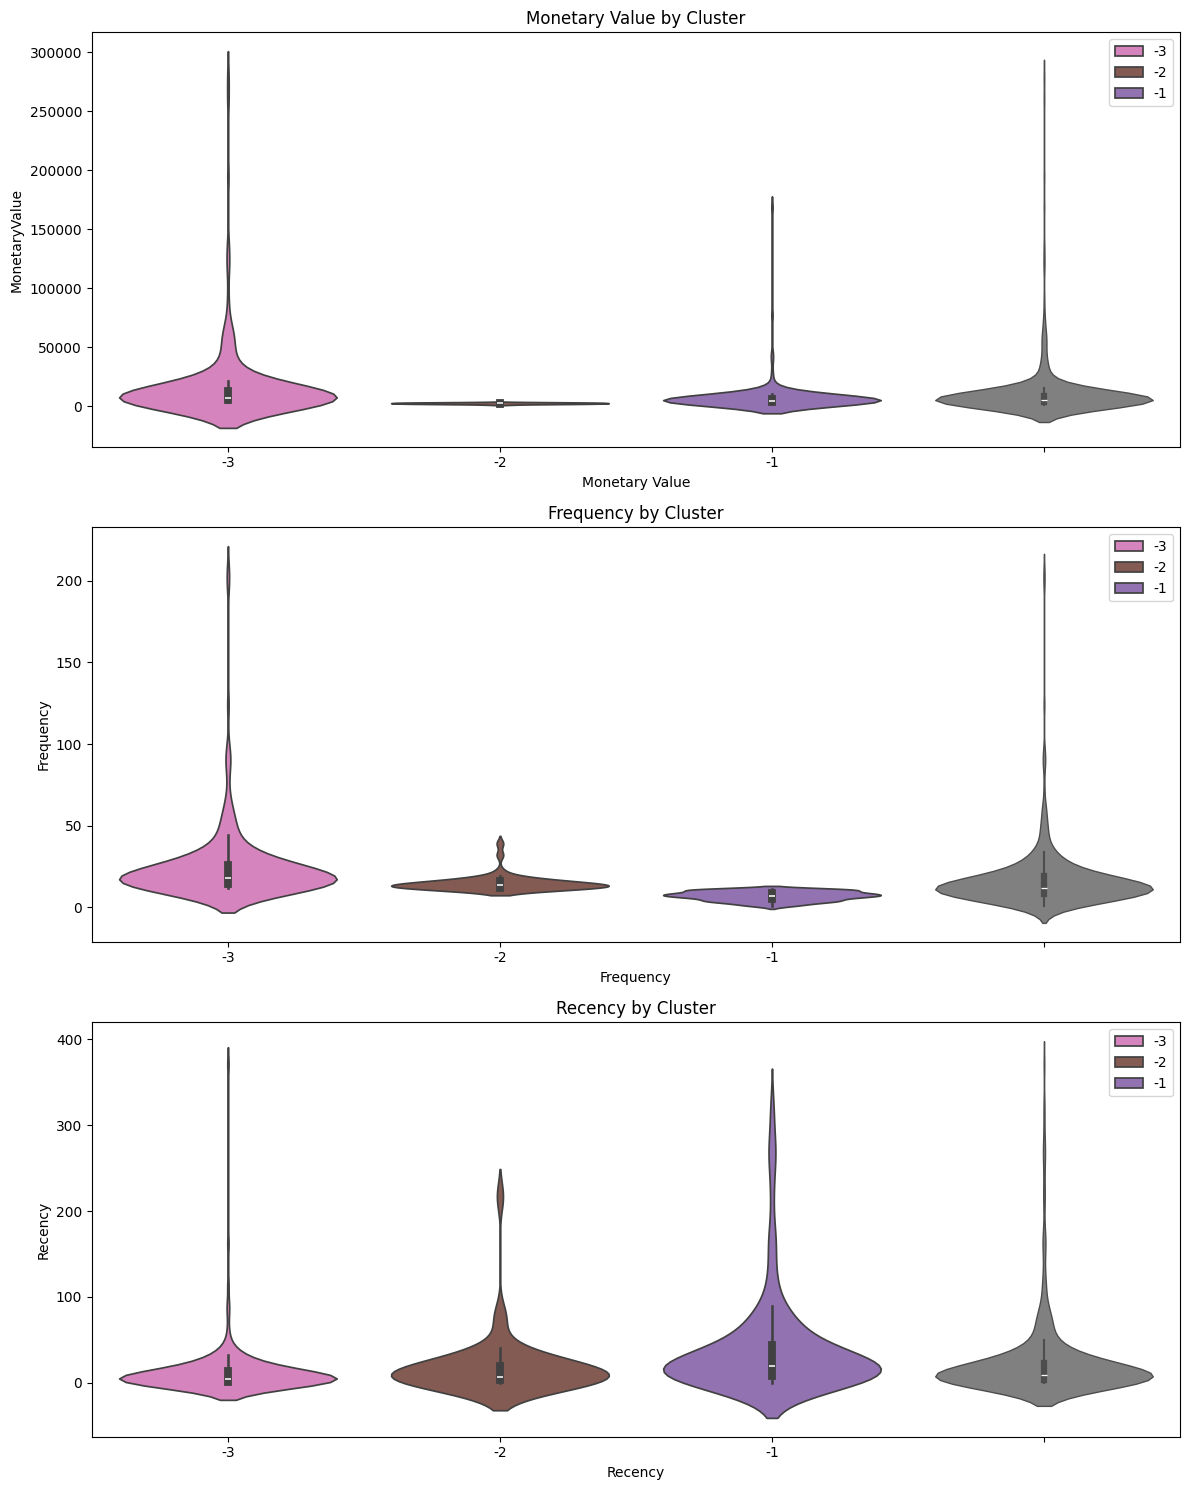

In [40]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'
                 }
        
plt.figure(figsize = (12, 15))

plt.subplot(3, 1, 1)
sns.violinplot(x = outlier_clusters['Cluster'], y = outlier_clusters['MonetaryValue'], palette = cluster_colors, hue = outlier_clusters['Cluster'])
sns.violinplot(y = outlier_clusters['MonetaryValue'], color = 'gray', linewidth = 1.0)
plt.title('Monetary Value by Cluster')
plt.xlabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x = outlier_clusters['Cluster'], y = outlier_clusters['Frequency'], palette = cluster_colors, hue = outlier_clusters['Cluster'])
sns.violinplot(y = outlier_clusters['Frequency'], color = 'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.xlabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x = outlier_clusters['Cluster'], y = outlier_clusters['Recency'], palette = cluster_colors, hue = outlier_clusters['Cluster'])
sns.violinplot(y = outlier_clusters['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


**Cluster - 1 (Monetary Outliers) PAMPER:**
<br/> __-__ Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
<br/> __-__ Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

**Cluster - 2 (Frequency Outliers) UPSELL:**
<br/> __-__ Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
<br/> __-__ Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

**Cluster - 3 (Monetary & Frequency Outliers) DELIGHT:**
<br/> __-__ Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
<br/> __-__ Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [41]:
cluster_labels = {0: 'RETAIN', 1: 'RE-ENGAGE', 2: 'NURTURE',
                  3: 'REWARD', -1: 'PAMPER', -2: 'UPSELL',
                  -3: 'DELIGHT'}

full_clustering = pd.concat([non_outliers, outlier_clusters])
full_clustering['ClusterLabel'] = full_clustering['Cluster'].map(cluster_labels)
full_clustering

CustomerID  MonetaryValue  Frequency     LastInvoiceDate  Recency  \
2        12348.0        1437.24          4 2011-09-25 13:13:00       74   
3        12349.0        1457.55          1 2011-11-21 09:51:00       18   
4        12350.0         294.40          1 2011-02-02 16:01:00      309   
5        12352.0        1385.74          7 2011-11-03 14:37:00       35   
6        12353.0          89.00          1 2011-05-19 17:47:00      203   
...          ...            ...        ...                 ...      ...   
4249     18172.0        7561.68         20 2011-11-25 11:12:00       14   
4269     18198.0        5425.56         17 2011-12-05 14:49:00        3   
4288     18223.0        6484.54         14 2011-12-05 09:11:00        4   
4290     18225.0        5509.12         12 2011-12-06 13:27:00        2   
4294     18229.0        7276.90         20 2011-11-28 09:48:00       11   

      Cluster ClusterLabel  
2           3       REWARD  
3           0       RETAIN  
4           1    RE-ENGAGE  
5           2      NURTURE  
6           1    RE-ENGAGE  
...       ...          ...  
4249       -3      DELIGHT  
4269       -3      DELIGHT  
4288       -3      DELIGHT  
4290       -3      DELIGHT  
4294       -3      DELIGHT  

[4335 rows x 7 columns]

In [42]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set the title
st.title("🛍️ Customer Segmentation Dashboard using K-Means")

# Upload data
uploaded_file = st.sidebar.file_uploader("Upload dataset", type=["csv", "xlsx"])

if uploaded_file is not None:
    df = pd.read_excel(uploaded_file)
    
    # Data Cleaning and RFM Calculation (simplified)
    # ...
    
    st.subheader("RFM Features Summary")
    st.write(df.describe())

    # Number of clusters
    k = st.sidebar.slider("Number of clusters (k)", 2, 10, 4)

    # Clustering
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary']])
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(rfm_scaled)

    # PCA for 2D Plot
    pca = PCA(n_components=2)
    pca_df = pca.fit_transform(rfm_scaled)
    df['PCA1'], df['PCA2'] = pca_df[:, 0], pca_df[:, 1]

    # Plot clusters
    st.subheader("Customer Segments (PCA Projection)")
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', ax=ax)
    st.pyplot(fig)

    # Cluster summary
    st.subheader("Cluster Summary")
    st.write(df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean())

    # Option to download
    csv = df.to_csv(index=False)
    st.download_button("Download Clustered Data", csv, "clustered_customers.csv", "text/csv")

else:
    st.info("Please upload a dataset to start.")


Overwriting dashboard.py


In [ ]:
!streamlit run dashboard.py

In [1]:
# %%writefile dashboard.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime

st.set_page_config(page_title="Customer Segmentation", layout="wide")
st.title("🛍️ Online Retail Customer Segmentation Dashboard")

uploaded_file = st.sidebar.file_uploader("Upload Online Retail Excel File", type=["xlsx"])

if uploaded_file:
    data = pd.read_excel(uploaded_file)
    data.dropna(subset=['CustomerID'], inplace=True)
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    data['TotalSum'] = data['Quantity'] * data['UnitPrice']

    # Calculate RFM
    snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
    rfm = data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'nunique',
        'TotalSum': 'sum'
    })
    rfm.rename(columns={
        'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        'TotalSum': 'Monetary'
    }, inplace=True)

    st.subheader("RFM Metrics Overview")
    st.dataframe(rfm.describe())

    # Choose number of clusters
    k = st.sidebar.slider("Select Number of Clusters", 2, 10, 4)

    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

    # PCA for visualization
    pca = PCA(n_components=2)
    rfm_pca = pca.fit_transform(rfm_scaled)
    rfm['PCA1'] = rfm_pca[:, 0]
    rfm['PCA2'] = rfm_pca[:, 1]

    # Cluster scatter plot
    st.subheader("Customer Segmentation Visualized")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', ax=ax)
    st.pyplot(fig)

    # Cluster summary
    st.subheader("Cluster Summary (Mean RFM Values)")
    st.dataframe(rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean())

    # Download clustered data
    st.subheader("Download Clustered Data")
    csv = rfm.reset_index().to_csv(index=False)
    st.download_button("Download CSV", csv, "clustered_customers.csv", "text/csv")
else:
    st.info("Please upload an Online Retail Excel file to begin.")

2025-04-08 19:47:26.575 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:47:26.577 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:47:29.349 
  command:

    streamlit run C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-08 19:47:29.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:47:29.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:47:29.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:4

In [ ]:
!streamlit run dashboard.py